
**Implementing a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.**

In [ ]:
#mounting drive
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing necessary libraries
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.applications import VGG16
import joblib
import matplotlib.pyplot as plt

In [ ]:
#Function definition to load and count the number of cats and dogs in the dataset
def load_data_and_count(img_dir, img_size=(128, 128)):
    data = []
    labels = []
    cat_count = 0
    dog_count = 0

    for img in os.listdir(img_dir):
        try:
            img_path = os.path.join(img_dir, img)
            img_array = image.load_img(img_path, target_size=img_size)
            img_array = image.img_to_array(img_array)
            img_array = preprocess_input(img_array)

            data.append(img_array)
            if 'cat' in img.lower():
                labels.append('cat')
                cat_count += 1
            elif 'dog' in img.lower():
                labels.append('dog')
                dog_count += 1
            else:
                continue
        except Exception as e:
            print(f"Error loading image {img}: {e}")
            continue

    print(f"Total cats: {cat_count}")
    print(f"Total dogs: {dog_count}")

    return np.array(data), np.array(labels)

In [ ]:
#Specifying the path to your dataset
img_dir = '/content/drive/MyDrive/Prodigy/train'

#Loading the data and count the number of cats and dogs
data, labels = load_data_and_count(img_dir)

Total cats: 491
Total dogs: 508


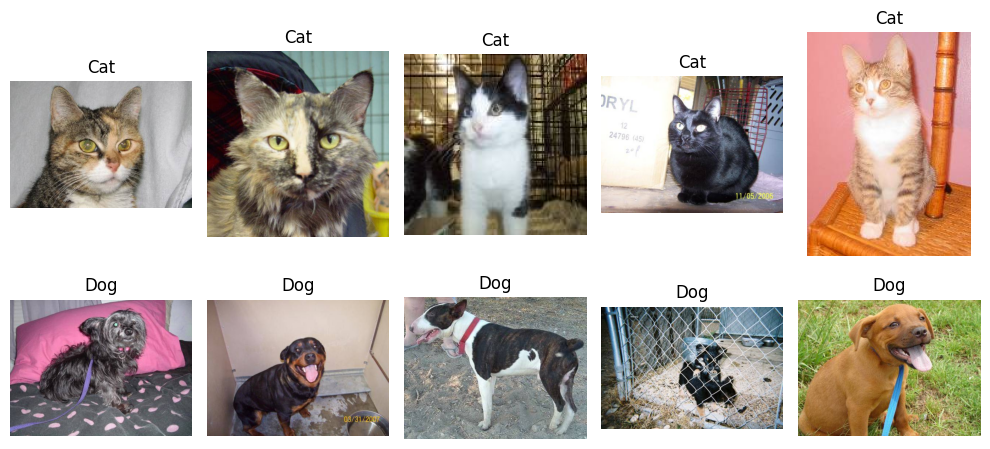

In [ ]:
#Visualizing Sample Images
def display_sample_images(img_dir, n_samples=5):
    cat_images = [img for img in os.listdir(img_dir) if 'cat' in img.lower()]
    dog_images = [img for img in os.listdir(img_dir) if 'dog' in img.lower()]

    plt.figure(figsize=(10, 5))

    for i, img_name in enumerate(cat_images[:n_samples]):
        img_path = os.path.join(img_dir, img_name)
        img = image.load_img(img_path)
        plt.subplot(2, n_samples, i + 1)
        plt.imshow(img)
        plt.title('Cat')
        plt.axis('off')

    for i, img_name in enumerate(dog_images[:n_samples]):
        img_path = os.path.join(img_dir, img_name)
        img = image.load_img(img_path)
        plt.subplot(2, n_samples, i + 1 + n_samples)
        plt.imshow(img)
        plt.title('Dog')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_sample_images(img_dir)


In [ ]:
# Encoding the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = np.hstack((labels, 1 - labels))

In [ ]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Loading the VGG16 model pre-trained on ImageNet
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

def extract_features(data, model):
    features = model.predict(data)
    return features.reshape(features.shape[0], -1)

# Extracting the features
X_train_features = extract_features(X_train, vgg_model)
X_test_features = extract_features(X_test, vgg_model)

7/7 [==============================] - 41s 6s/step


In [ ]:
# Training the SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_features, y_train.argmax(axis=1))

SVC(kernel='linear', probability=True)

In [ ]:
# Evaluating the model
y_pred = svm.predict(X_test_features)
y_test_labels = y_test.argmax(axis=1)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1])

In [ ]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred, target_names=["cats", "dogs"]))

print("Accuracy Score:", accuracy_score(y_test_labels, y_pred))

Classification Report:
              precision    recall  f1-score   support

        cats       0.92      0.92      0.92       106
        dogs       0.91      0.91      0.91        94

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

Accuracy Score: 0.92


In [ ]:

# Saving the model
joblib.dump(svm, 'svm_model.pkl')

# Defining the function to preprocess a single image
def preprocess_single_image(img_path, img_size=(128, 128)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    return np.expand_dims(img_array, axis=0)

# Defining the function to extract features from a single image
def extract_features_single_image(img_array, model):
    features = model.predict(img_array)
    return features.reshape(1, -1)

# Loading the VGG16 model pre-trained on ImageNet
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Loading the trained SVM model
svm = joblib.load('svm_model.pkl')

# Function defintion to make a single prediction
def predict_single_image(img_path):
    img_array = preprocess_single_image(img_path)
    img_features = extract_features_single_image(img_array, vgg_model)
    prediction = svm.predict(img_features)
    prediction_label = "cat" if prediction[0] == 1 else "dog"
    return prediction_label

#Single Prediction:
img_path = '/content/drive/MyDrive/Prodigy/train/dog.10796.jpg'
prediction = predict_single_image(img_path)
print(f'The image is predicted to be a {prediction}.')


1/1 [==============================] - 1s 747ms/step
The image is predicted to be a dog.


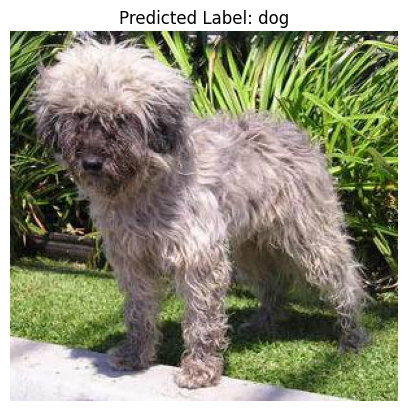

In [ ]:
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Predicted Label: {prediction}')
plt.axis('off')
plt.show()
